## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [423]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [424]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [425]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [426]:
# answer below:
reviews_df = reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

Check for missing values and remove all rows containing missing values

In [427]:
def missingness_summary(df, print_log, sort):
  '''
  Return a pandas series containing the percentage of missing data in each column.
  
  Args:
  df - pandas dataframe 

  print_log (boolean) - if True, print out all of the columns in the dataframe, 
    one to a line, followed by the percentage of total rows that have a 
    null value for that column.
    
  sort (string) - specify if the output should be sorted in ascending order, 
    descending order, or not at all.
  '''
  if print_log == True:
    series = pd.Series(df.isnull().sum()*100/df.isnull().count())
    if sort == 'Ascending':
      series = series.sort_values(ascending = True)
    elif sort == 'Descending':
      series = series.sort_values(ascending=False)
    else:
      series
    return series

In [428]:
# answer below:
reviews_df.isnull().sum()
missingness_summary(reviews_df, True, 'Descending')

Rating            13.596532
Content Rating     0.009224
Type               0.009224
Price              0.000000
Reviews            0.000000
dtype: float64

In [429]:
reviews_df.dropna(subset=['Rating', 'Content Rating', 'Type'], inplace=True)

Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [430]:
# reviews_df = reviews3.loc[ (reviews_df['Content Rating'] != 'Adults only 18+') & (reviews3['Content Rating'] != 'Unrated') ]
reviews_df.drop(reviews_df[reviews_df['Content Rating'] == 'Adults only 18+'].index, inplace=True)
reviews_df.drop(reviews_df[reviews_df['Content Rating'] == 'Unrated'].index, inplace=True)

Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [431]:
# answer below:
# hp['is_pave'] = pd.get_dummies(hp.street, drop_first=True)
# hp = pd.concat([hp, pd.get_dummies(hp.roofstyle, prefix='roofstyle', drop_first=True)], axis=1)

reviews_df = pd.concat([reviews_df, pd.get_dummies(reviews_df['Content Rating'], drop_first=True)], axis=1)
reviews_df = pd.concat([reviews_df, pd.get_dummies(reviews_df['Type'], drop_first=True)], axis=1)

Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [432]:
reviews_df['Price'] = reviews_df.Price.str.strip('$ ')
# reviews_df['Price'] = reviews_df.Price.str.strip()

In [433]:
reviews_df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [434]:
cols = ['Price', 'Reviews']
reviews_df[cols] = reviews_df[cols].apply(pd.to_numeric, errors='raise', axis=1)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9362 non-null   float64
 1   Reviews         9362 non-null   float64
 2   Type            9362 non-null   object 
 3   Price           9362 non-null   float64
 4   Content Rating  9362 non-null   object 
 5   Everyone 10+    9362 non-null   uint8  
 6   Mature 17+      9362 non-null   uint8  
 7   Teen            9362 non-null   uint8  
 8   Paid            9362 non-null   uint8  
dtypes: float64(3), object(2), uint8(4)
memory usage: 475.4+ KB


In [435]:
reviews_df.isnull().sum()

Rating            0
Reviews           0
Type              0
Price             0
Content Rating    0
Everyone 10+      0
Mature 17+        0
Teen              0
Paid              0
dtype: int64

Perform a train test split with 20% of the data in the test sample.

In [436]:
# answer below:
y = reviews_df['Rating']
X = reviews_df.drop(['Type', 'Content Rating', 'Rating'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

Although our model has a very low p-value for the f-stat, the R-squared value is very low. Based on the .008 value, we know this model only explains about .8% of the variance in our target. 

Of our features only Reviews, Price, Teen and Paid have p-values below our significance throshold of .05. Even though those four were statistically significant, their coefficients were very small, meaning they have very little impact on the target. 

In [437]:
X_con = sm.add_constant(X_train)

results = sm.OLS(y_train, X_con).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.19
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.81e-12
Time:                        21:14:53   Log-Likelihood:                -5685.3
No. Observations:                7489   AIC:                         1.138e+04
Df Residuals:                    7482   BIC:                         1.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1737      0.007    596.870   

In [438]:
predictions = results.predict(X_con)

# predictions
resid = results.resid

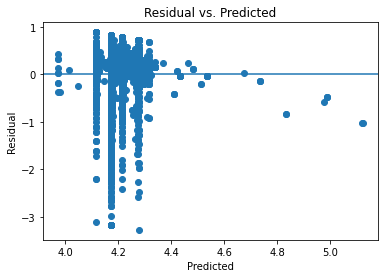

In [439]:
plt.scatter(predictions, resid)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

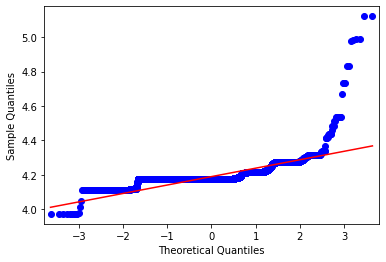

In [440]:
sm.qqplot(predictions.values, line='s') 
plt.show()

Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [441]:
from sklearn.preprocessing import StandardScaler

We did see some changes in the coefficients, with most of them coming out smaller than in the previous model. All of the p-values are now below .05 except for Everyone 10+. Adjusted R-squared and f-test are the same

In [442]:
ss = StandardScaler()
scaled = ss.fit_transform(X_train)

X_scaled = sm.add_constant(scaled)

results = sm.OLS(y_train, X_scaled).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.19
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.81e-12
Time:                        21:14:55   Log-Likelihood:                -5685.3
No. Observations:                7489   AIC:                         1.138e+04
Df Residuals:                    7482   BIC:                         1.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1895      0.006    700.995      0.0